In [74]:
!pip install category_encoders


In [75]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , PolynomialFeatures ,RobustScaler

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR

In [76]:
df =pd.read_csv("Cars.csv" )
df.drop('Unnamed: 0' , axis=1,inplace=True)



In [77]:
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,140000 to 159999,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,180000 to 199999,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,140000 to 159999,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,140000 to 159999,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,10000 to 19999,1000 - 1300 CC,Manual,75.0,Giza
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,160000 to 179999,1000 - 1300 CC,Manual,46.0,Cairo
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,20000 to 29999,1000 - 1300 CC,Manual,46.0,Alexandria
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,10000 to 19999,1000 - 1300 CC,Manual,43.7,Giza
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,10000 to 19999,1000 - 1300 CC,Manual,69.0,Cairo


# Exploring Data¶


In [78]:
# Checking the shape of datset
print(f'The shape of Airbnb Dataset is {df.shape}')

The shape of Airbnb Dataset is (14741, 11)


In [79]:
# Checking the feature names
print(f' The names of the features present in the dataset are: ')
list(df.columns)

 The names of the features present in the dataset are: 


['Brand',
 'Model',
 'Body',
 'Color',
 'Year',
 'Fuel',
 'Kilometers',
 'Engine',
 'Transmission',
 'Price',
 'Gov']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14741 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14741 non-null  object 
 1   Model         14741 non-null  object 
 2   Body          14741 non-null  object 
 3   Color         14741 non-null  object 
 4   Year          14741 non-null  int64  
 5   Fuel          14741 non-null  object 
 6   Kilometers    14741 non-null  object 
 7   Engine        14741 non-null  object 
 8   Transmission  14741 non-null  object 
 9   Price         14741 non-null  float64
 10  Gov           14741 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.2+ MB


In [81]:
df.describe()


,Year,Price
count,14741.000000,14741.000000
mean,2005.456821,116.584987
std,12.655566,82.192718
min,1970.000000,3.000000
25%,1998.000000,43.700000
50%,2010.000000,110.000000
75%,2015.000000,161.000000
max,2022.000000,471.500000


In [82]:
df.describe(include='object')


,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Gov
count,14741,14741,14741,14741,14741,14741,14741,14741,14741
unique,3,18,3,14,2,16,3,2,26
top,Hyundai,128,Sedan,White,Benzine,More than 200000,1600 CC,Manual,Cairo
freq,5692,2425,13453,2614,14200,2505,6762,9862,4458


In [83]:
# Checking for the null values
print(f'The missing values before cleaning the data are:')
df.isnull().sum()

The missing values before cleaning the data are:


Brand           0
Model           0
Body            0
Color           0
Year            0
Fuel            0
Kilometers      0
Engine          0
Transmission    0
Price           0
Gov             0
dtype: int64

In [84]:
df.Brand.value_counts()

Brand
Hyundai      5692
Fiat         5033
Chevrolet    4016
Name: count, dtype: int64

In [85]:
df.Model.value_counts()

Model
128        2425
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: count, dtype: int64

In [86]:
df.Body.value_counts()

Body
Sedan        13453
Hatchback     1106
SUV            182
Name: count, dtype: int64

In [87]:
df.Fuel.value_counts()

Fuel
Benzine        14200
Natural Gas      541
Name: count, dtype: int64

In [88]:
df.Color.value_counts()

Color
White              2614
Black              2032
Silver             1952
Gray               1670
Red                1538
Blue- Navy Blue    1406
Other Color        1134
Burgundy           1061
Green               456
Gold                374
Beige               152
Brown               140
Yellow              134
Orange               78
Name: count, dtype: int64

In [89]:
df.duplicated().sum()


1

In [90]:
df.drop_duplicates(inplace=True)

In [91]:
df.duplicated().sum()

0

# Feature Engineering¶


In [92]:
df.Kilometers.value_counts()


Kilometers
More than 200000    2505
10000 to 19999      1666
180000 to 199999    1349
100000 to 119999    1192
0 to 9999           1088
140000 to 159999    1064
120000 to 139999    1005
90000 to 99999       995
160000 to 179999     760
20000 to 29999       612
80000 to 89999       560
50000 to 59999       436
60000 to 69999       402
40000 to 49999       372
30000 to 39999       370
70000 to 79999       364
Name: count, dtype: int64

In [93]:
def Get_kilometers(Num):
    if Num == "More than 200000":
        Kilo = Num.split(" ")[2]    # Handling the Text 'More than 200000' by exchange it to integer 2000000

    else :
        Kilo = Num.split(sep="to")[1]
        Kilo = Kilo.strip()        # Handling '140000 to 159999' by Spliting them and Choose the Max
    return Kilo


In [94]:
df['Kilometers'] = df.Kilometers.apply(Get_kilometers)
df['Kilometers'] = df['Kilometers'].astype(int) # Convert the Column to integer
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,159999,1600 CC,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,199999,1000 - 1300 CC,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,159999,1400 - 1500 CC,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,159999,1600 CC,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,19999,1000 - 1300 CC,Manual,75.0,Giza


In [95]:
def Get_Engine(Num):
    if (len(Num) > 7) : # Spliting The data whose Length is more than 7 by spliting the range and remove 'CC' an Take Maximum
        Eng = Num.split(sep="-")[1]
        Eng = Eng.strip('CC')
        Eng = int(Eng)

    else:# Spliting The data whose Length is less than 7 by remove 'CC' an Take Maximum
        Eng = Num.strip('CC')
        Eng = int(Eng)

    return Eng

In [96]:
df['Engine'] = df.Engine.apply(Get_Engine)
df.head()

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov
0,Hyundai,Accent,Sedan,Black,2007,Benzine,159999,1600,Automatic,140.0,Giza
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,199999,1300,Manual,78.0,Qena
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,159999,1500,Manual,70.0,Giza
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,159999,1600,Automatic,150.0,Cairo
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,19999,1300,Manual,75.0,Giza


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14740 non-null  object 
 1   Model         14740 non-null  object 
 2   Body          14740 non-null  object 
 3   Color         14740 non-null  object 
 4   Year          14740 non-null  int64  
 5   Fuel          14740 non-null  object 
 6   Kilometers    14740 non-null  int64  
 7   Engine        14740 non-null  int64  
 8   Transmission  14740 non-null  object 
 9   Price         14740 non-null  float64
 10  Gov           14740 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [98]:
df.describe()

,Year,Kilometers,Engine,Price
count,14740.000000,14740.000000,14740.000000,14740.000000
mean,2005.458277,114711.517300,1496.729986,116.591608
std,12.654761,69953.949381,120.028488,82.191575
min,1970.000000,9999.000000,1300.000000,3.000000
25%,1998.000000,39999.000000,1500.000000,43.700000
50%,2010.000000,119999.000000,1500.000000,110.000000
75%,2015.000000,199999.000000,1600.000000,161.000000
max,2022.000000,200000.000000,1600.000000,471.500000


In [99]:
df['Age_of_Car'] = (2022 - df['Year'])


In [100]:
df

,Brand,Model,Body,Color,Year,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age_of_Car
0,Hyundai,Accent,Sedan,Black,2007,Benzine,159999,1600,Automatic,140.0,Giza,15
1,Hyundai,Accent,Sedan,Silver,2005,Benzine,199999,1300,Manual,78.0,Qena,17
2,Hyundai,Accent,Sedan,Gray,1999,Benzine,159999,1500,Manual,70.0,Giza,23
3,Hyundai,Accent,Sedan,Blue- Navy Blue,2009,Benzine,159999,1600,Automatic,150.0,Cairo,13
4,Hyundai,Accent,Sedan,Silver,2000,Benzine,19999,1300,Manual,75.0,Giza,22
...,...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,1997,Benzine,179999,1300,Manual,46.0,Cairo,25
14737,Fiat,Uno,Hatchback,Silver,1996,Benzine,29999,1300,Manual,46.0,Alexandria,26
14738,Fiat,Uno,Hatchback,Burgundy,1993,Benzine,19999,1300,Manual,43.7,Giza,29
14739,Fiat,Uno,Hatchback,Silver,1996,Benzine,19999,1300,Manual,69.0,Cairo,26


In [101]:
df['Age_of_Car'].max()

52

In [102]:
df.drop('Year',axis=1 ,inplace=True)


In [103]:
df.Price = df.Price.apply(lambda x : x * 1000 )           # Function to Multiply each Value by 1000
df

,Brand,Model,Body,Color,Fuel,Kilometers,Engine,Transmission,Price,Gov,Age_of_Car
0,Hyundai,Accent,Sedan,Black,Benzine,159999,1600,Automatic,140000.0,Giza,15
1,Hyundai,Accent,Sedan,Silver,Benzine,199999,1300,Manual,78000.0,Qena,17
2,Hyundai,Accent,Sedan,Gray,Benzine,159999,1500,Manual,70000.0,Giza,23
3,Hyundai,Accent,Sedan,Blue- Navy Blue,Benzine,159999,1600,Automatic,150000.0,Cairo,13
4,Hyundai,Accent,Sedan,Silver,Benzine,19999,1300,Manual,75000.0,Giza,22
...,...,...,...,...,...,...,...,...,...,...,...
14736,Fiat,Uno,Hatchback,Burgundy,Benzine,179999,1300,Manual,46000.0,Cairo,25
14737,Fiat,Uno,Hatchback,Silver,Benzine,29999,1300,Manual,46000.0,Alexandria,26
14738,Fiat,Uno,Hatchback,Burgundy,Benzine,19999,1300,Manual,43700.0,Giza,29
14739,Fiat,Uno,Hatchback,Silver,Benzine,19999,1300,Manual,69000.0,Cairo,26


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14740 non-null  object 
 1   Model         14740 non-null  object 
 2   Body          14740 non-null  object 
 3   Color         14740 non-null  object 
 4   Fuel          14740 non-null  object 
 5   Kilometers    14740 non-null  int64  
 6   Engine        14740 non-null  int64  
 7   Transmission  14740 non-null  object 
 8   Price         14740 non-null  float64
 9   Gov           14740 non-null  object 
 10  Age_of_Car    14740 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


# Data Visualisation¶


In [105]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols


['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']

In [106]:
for col in cat_cols:
    print(df[col].value_counts())
    print('------------------------------------------------------------')


Brand
Hyundai      5692
Fiat         5032
Chevrolet    4016
Name: count, dtype: int64
------------------------------------------------------------
Model
128        2424
Verna      1903
Elantra    1529
Lanos      1342
Accent     1272
Optra      1252
Shahin     1142
Aveo        994
131         572
Cruze       428
Uno         350
Avante      282
Tipo        274
Punto       270
Matrix      268
Tucson      182
I10         166
Excel        90
Name: count, dtype: int64
------------------------------------------------------------
Body
Sedan        13452
Hatchback     1106
SUV            182
Name: count, dtype: int64
------------------------------------------------------------
Color
White              2614
Black              2032
Silver             1952
Gray               1670
Red                1537
Blue- Navy Blue    1406
Other Color        1134
Burgundy           1061
Green               456
Gold                374
Beige               152
Brown               140
Yellow              134
Orang

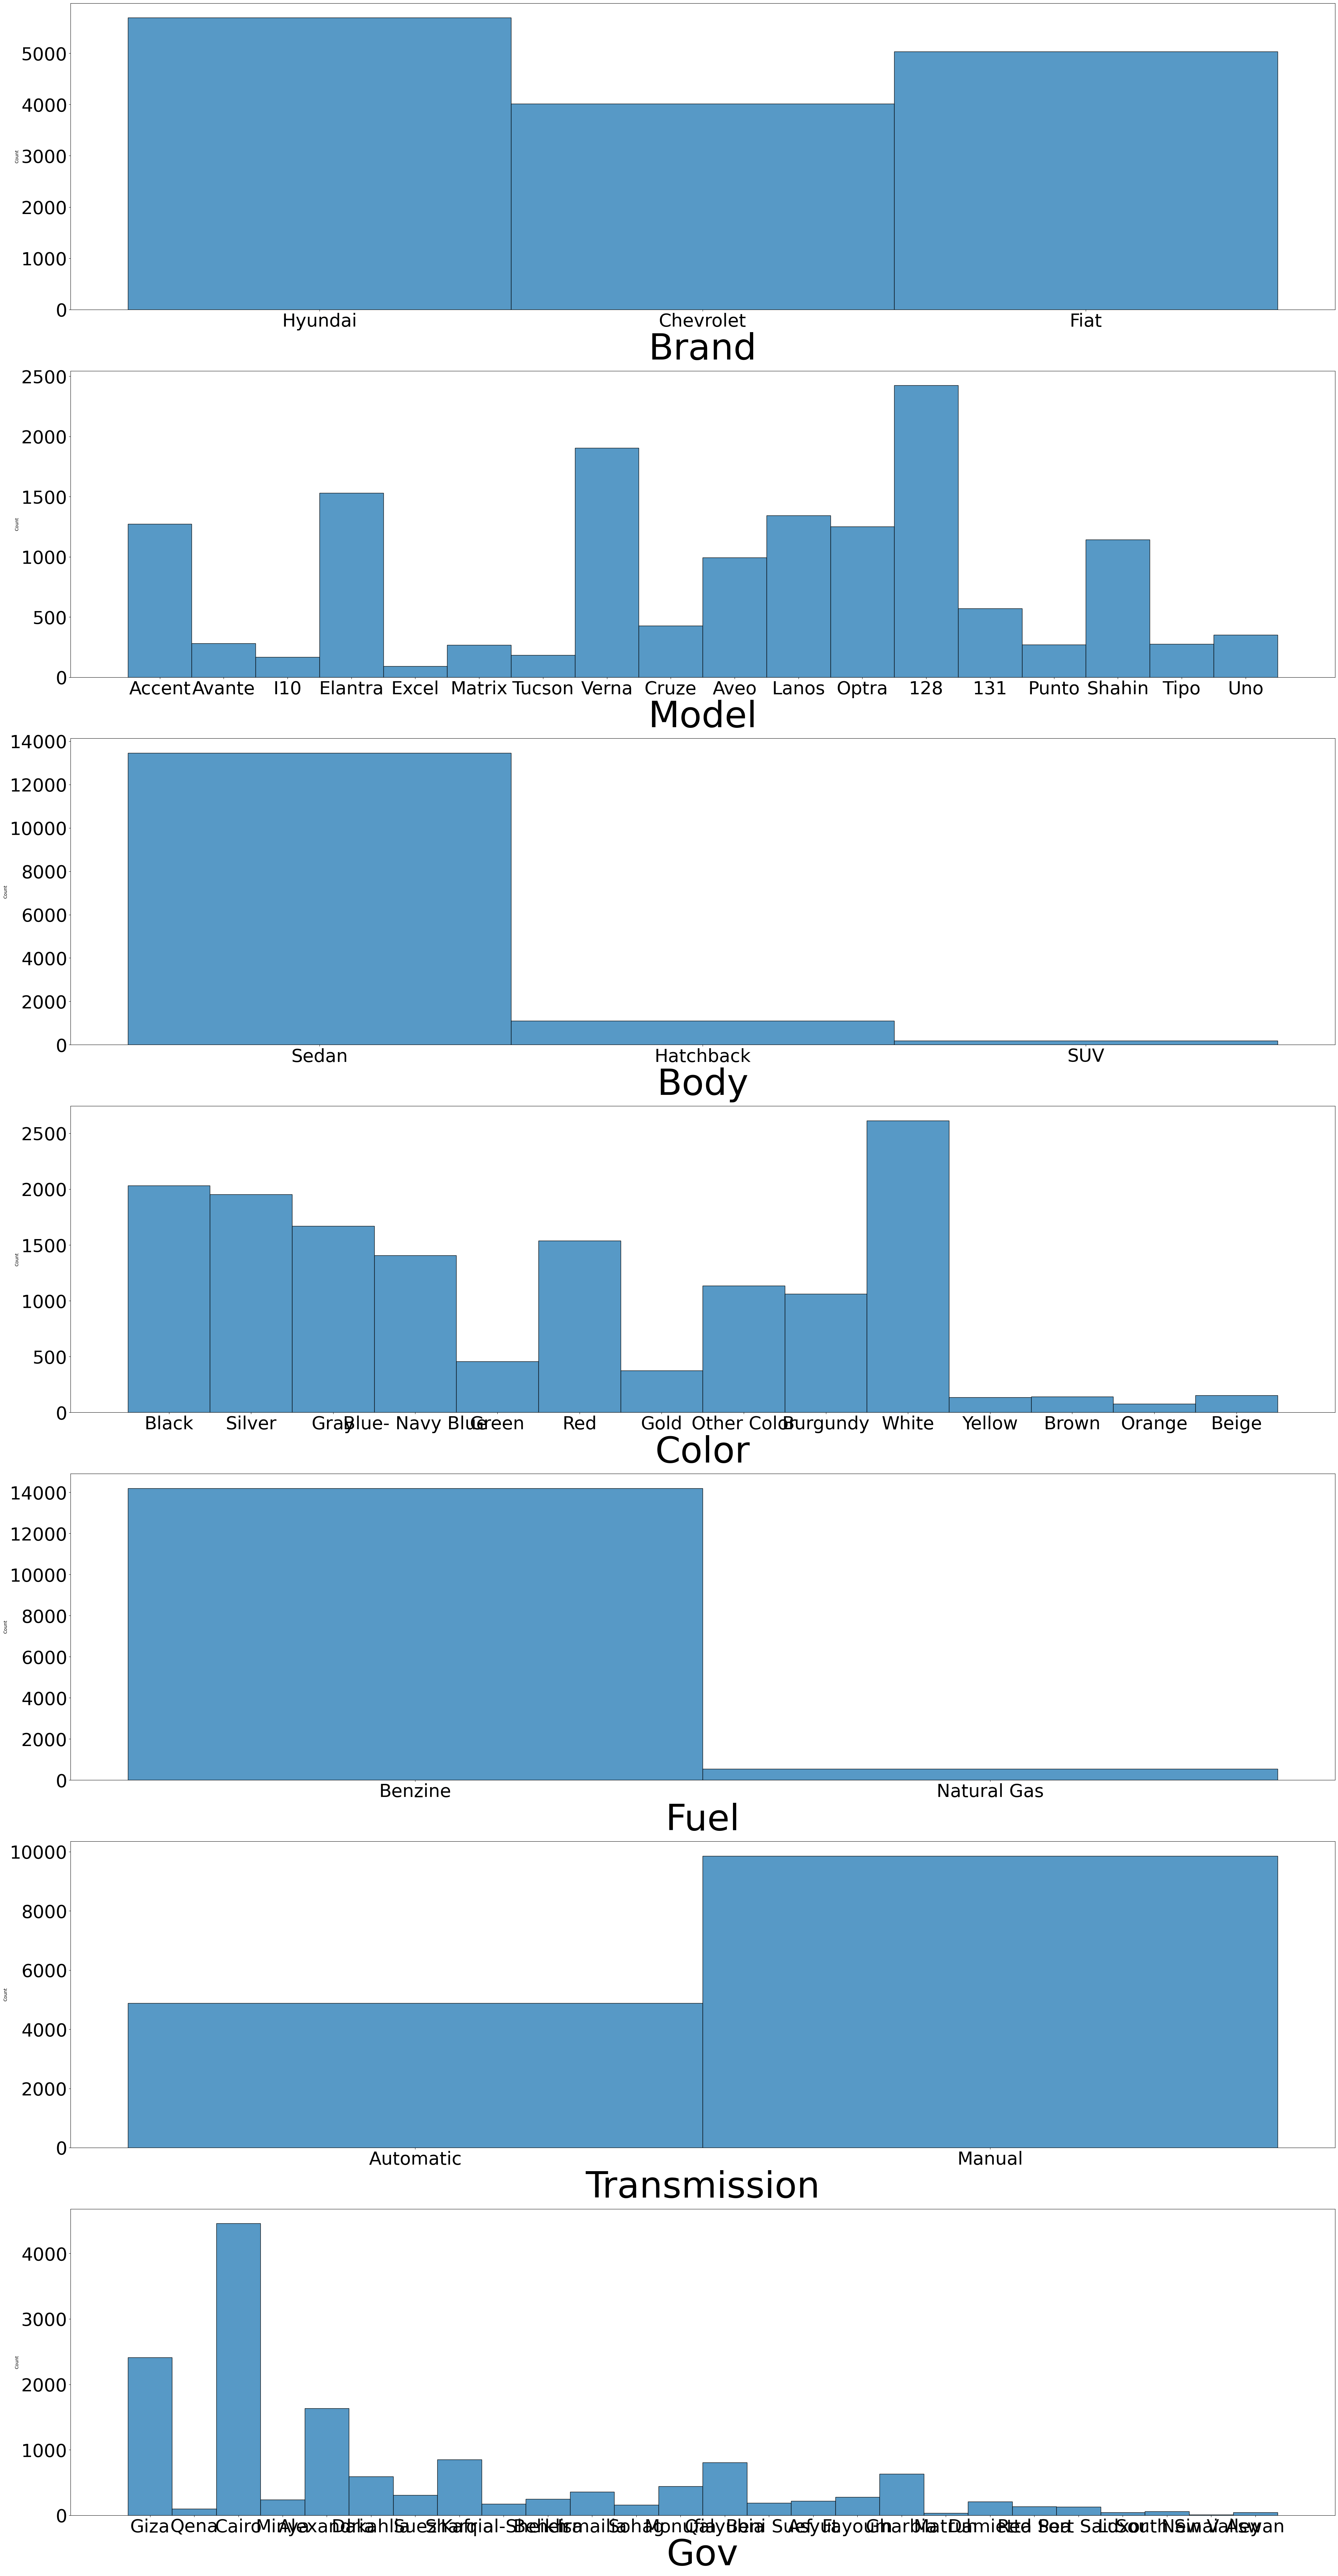

In [107]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (cat_cols  ,1) :
    plt.subplot((len(cat_cols)//1) , 1 , i )
    sns.histplot(data = df , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)


### brand ---> most popular is Htheyundai
### Model ---> Although the most common brand is Hyundai, the most popular model is the 128
### Body ---> most popular is Sedan
### Color ---> most popular is White
### Fuel ---> It is natural that Benzine is the most, because natural gas is one of the types that appeared recently
### Transmission ---> With the continuous development in the world of cars, automatic cars are modern and help trainees to drive well, while manual cars are the basis for driving education, so it is natural that they are the most popular.
### Gov ---> Given that Cairo is the capital of Egypt and the center of life services in it, as it has the largest number of families among the population, it is natural that the governorates use the most cars.

In [108]:
num_cols = df.select_dtypes(exclude = 'O').columns.tolist()
num_cols

['Kilometers', 'Engine', 'Price', 'Age_of_Car']

In [109]:
for col in num_cols:
    print(df[col].value_counts())
    print('------------------------------------------------------------')

Kilometers
200000    2505
19999     1666
199999    1349
119999    1192
9999      1088
159999    1064
139999    1005
99999      995
179999     760
29999      612
89999      560
59999      436
69999      402
49999      372
39999      370
79999      364
Name: count, dtype: int64
------------------------------------------------------------
Engine
1600    6762
1500    4356
1300    3622
Name: count, dtype: int64
------------------------------------------------------------
Price
115000.0    254
23000.0     234
138000.0    209
161400.0    195
185600.0    195
           ... 
122500.0      1
68500.0       1
202000.0      1
111100.0      1
46600.0       1
Name: count, Length: 631, dtype: int64
------------------------------------------------------------
Age_of_Car
9     850
12    763
11    728
7     727
10    693
5     690
8     622
3     607
13    591
4     574
6     562
14    485
1     388
16    348
2     346
15    300
21    260
23    241
22    231
20    230
24    219
17    218
35    212
19    

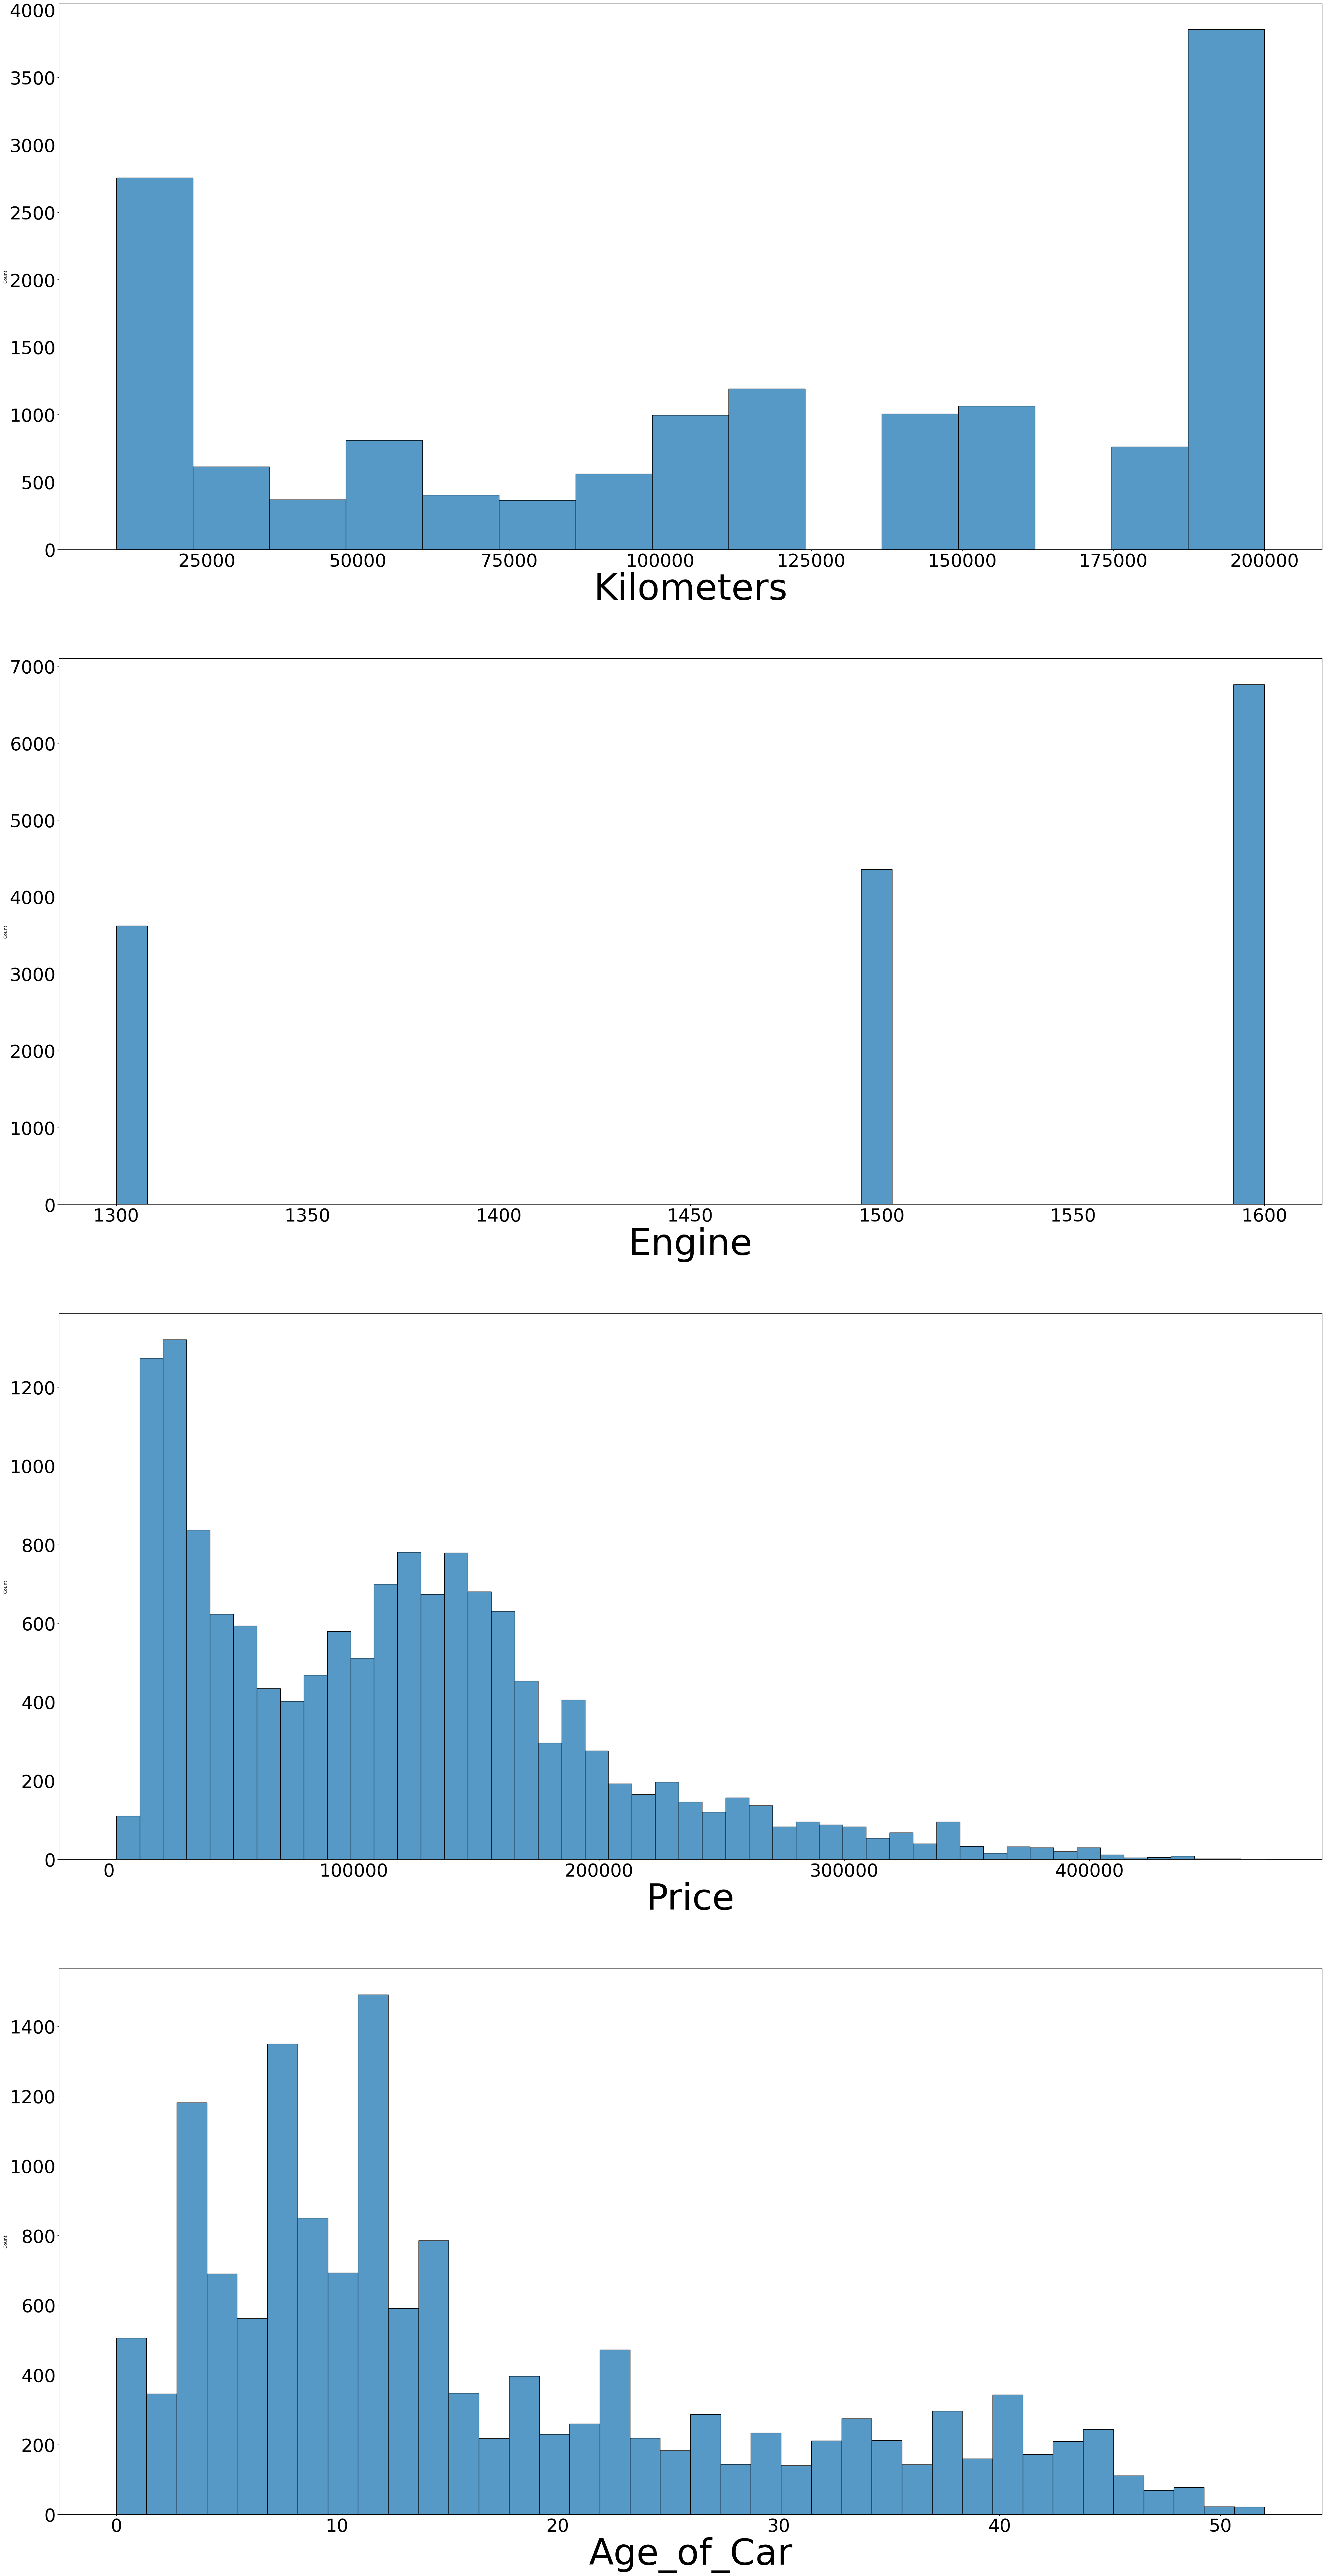

In [110]:
plt.figure(figsize = (50 , 100))
for i , col in enumerate (num_cols ,1) :
    plt.subplot((len(num_cols)//1) , 1 , i )
    sns.histplot(data = df , x = col)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    plt.xlabel(col, fontsize=80)

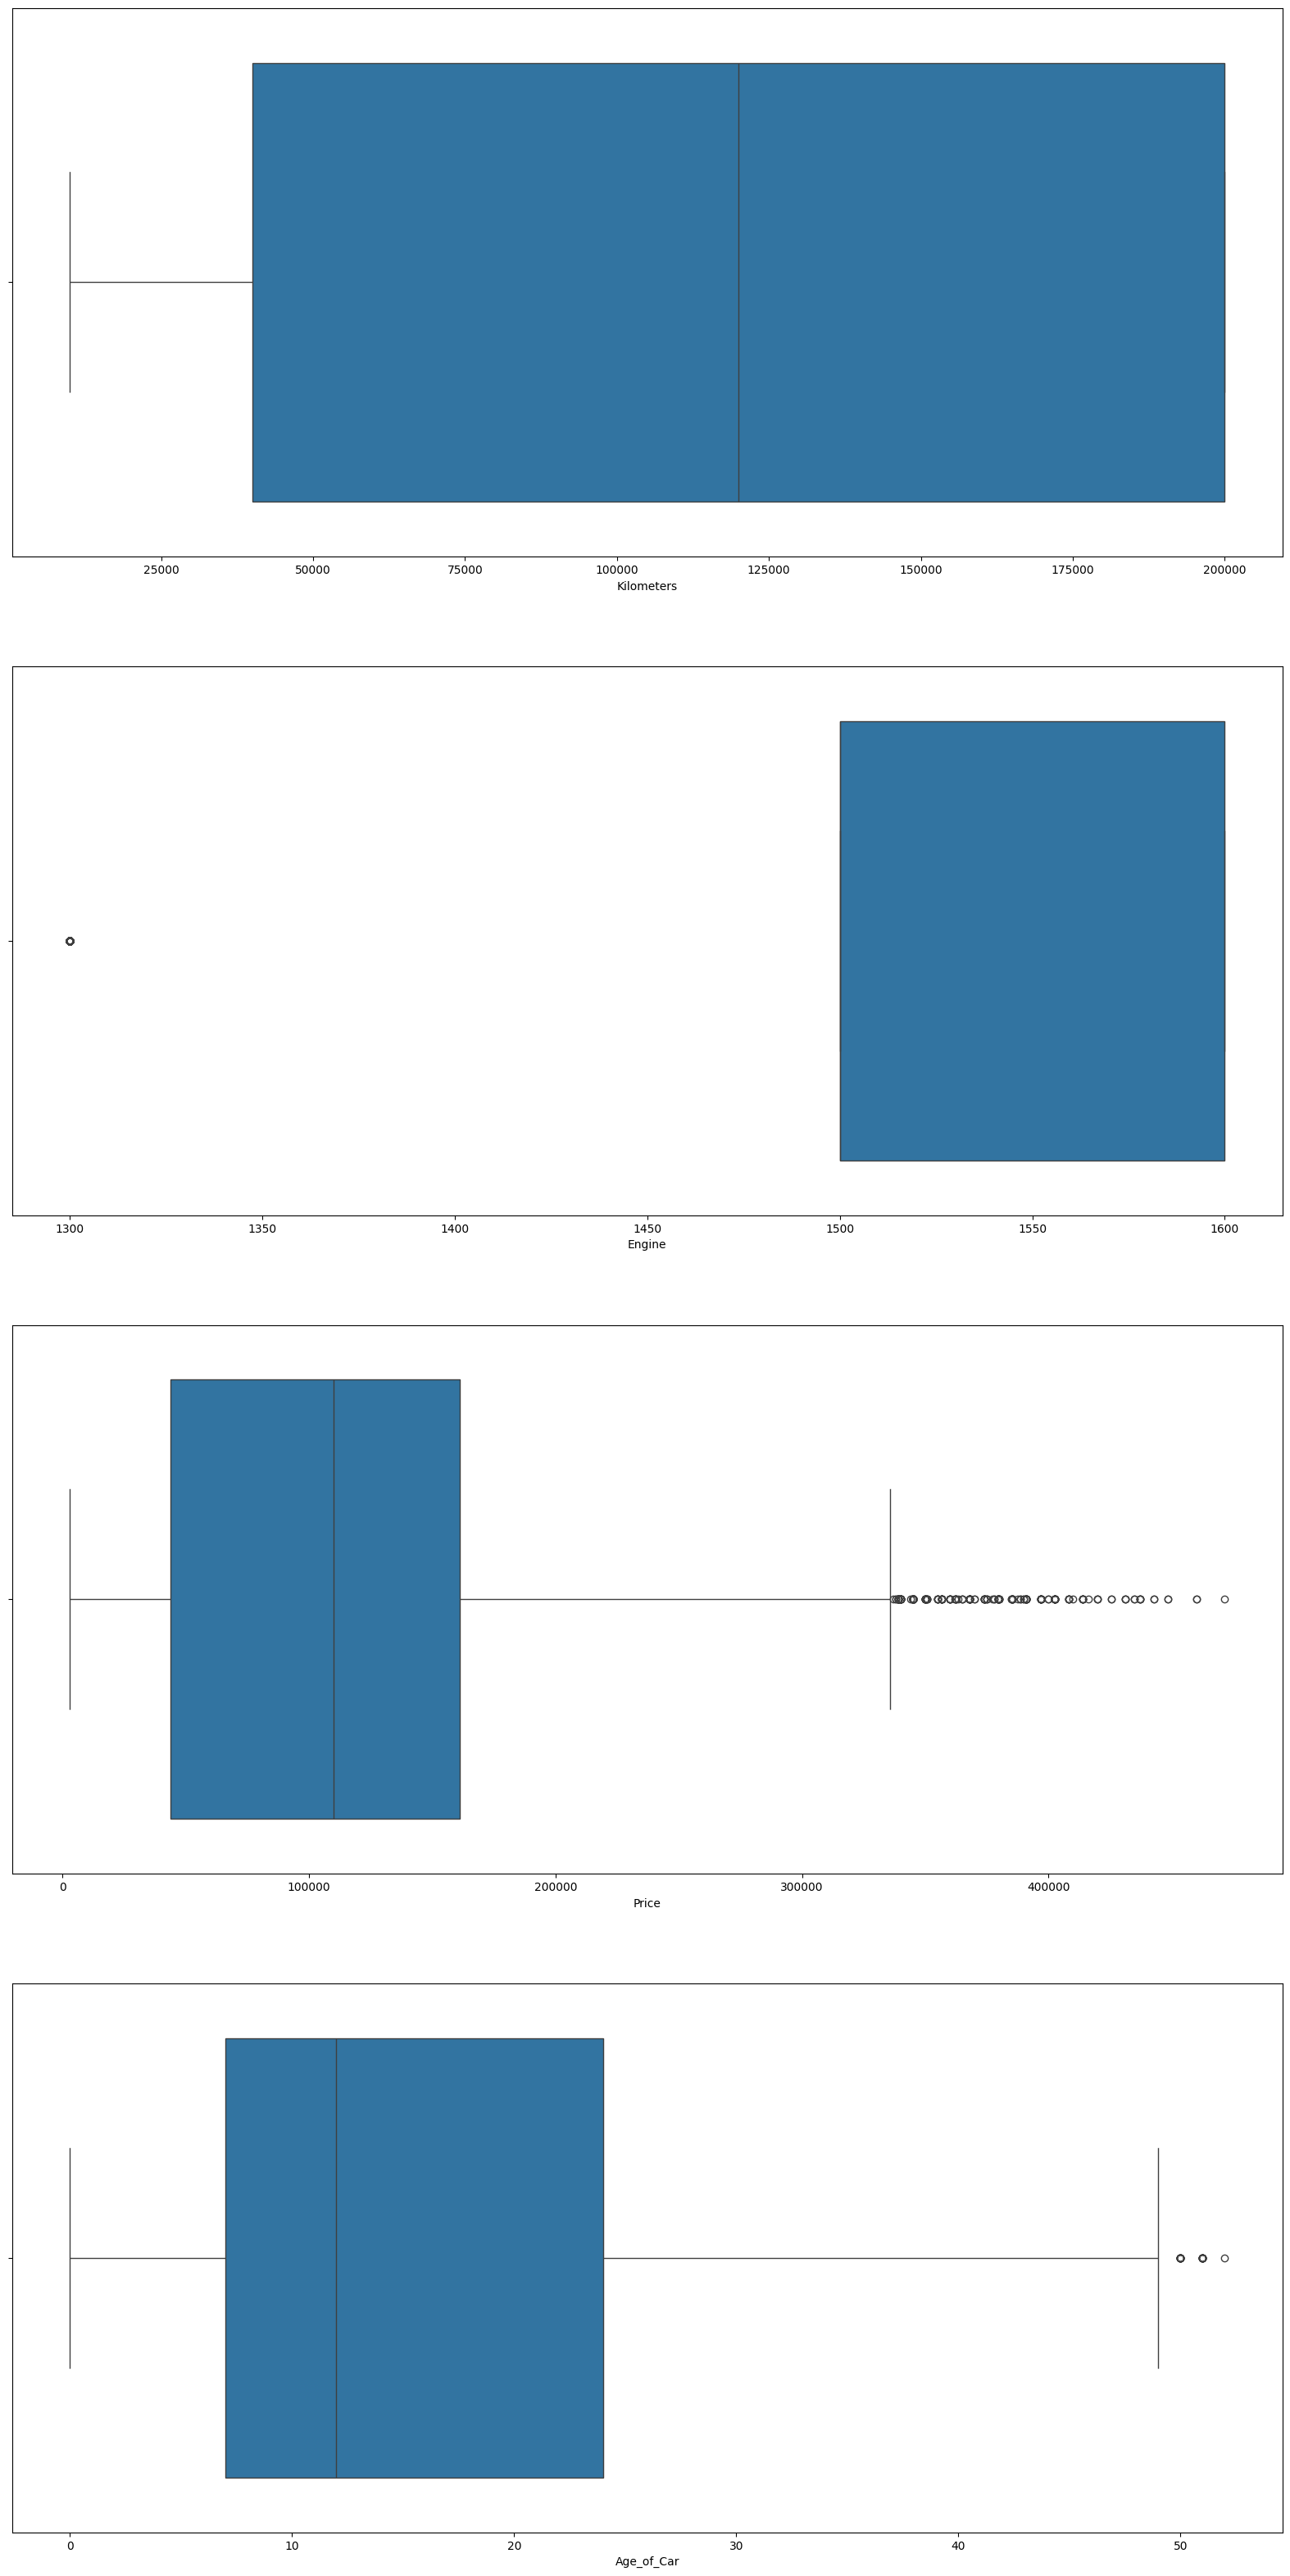

In [111]:
plt.figure(figsize = (20 , 40))
for i , col in enumerate (num_cols ,1) :
    plt.subplot((len(num_cols)//1) , 1 , i )
    sns.boxplot(data = df , x = col)

# Bivariate Analysis¶


## Q.1 Is there a significant relationship between a Brand and their likelihood to Price ?


In [112]:
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
fig = px.bar(brand_price , color = brand_price.index )
fig.show()

## Hyundai cars are the highest.


### Q.2 Is there a significant relationship between a Model and their likelihood to price ?


In [113]:
model_price = df.groupby('Model')['Price'].mean().sort_values(ascending=False)
fig = px.bar(model_price , color = model_price.index )
fig.show()

### Although the most-produced car in the dataset is the 128, it represents the lowest average price and the Tipo is the most-produced.

###Q.3 Is there a significant relationship between a Body and their likelihood to price ?


In [114]:
body_price = df.groupby('Body')['Price'].mean().sort_values(ascending=False)
fig = px.bar(body_price , color = body_price.index )
fig.show()

###Q.4 Is there a significant relationship between a Fuel and their likelihood to price ?


In [115]:
fuel_price = df.groupby('Fuel')['Price'].mean().sort_values(ascending=False)
fig = px.bar(fuel_price , color = fuel_price.index )
fig.show()

### Q.5 Is there a significant relationship between a Transmission and their likelihood to price ?


In [116]:
Transmission_price = df.groupby('Transmission')['Price'].mean().sort_values(ascending=False)
fig = px.bar(Transmission_price , color = Transmission_price.index )
fig.show()

### Q.6 Does the Kilometers of a customer have a significant impact on their likelihood to Price?


In [117]:
fig = px.scatter(df , x = (df['Kilometers']),y= (df['Price']), trendline='ols')
fig.show()

## It is natural for the relationship to be inverse, because with an increase in car traffic, it leads to a decrease in their prices


## Q.7 Does the Engine of a customer have a significant impact on their likelihood to Price?


In [118]:
fig = px.scatter(df , x = (df['Engine']),y= (df['Price']), trendline='ols')
fig.show()

### We note that there is a direct relationship that when the Engine increases, the price of the car increases


### Q.8 Does the Age_of_Car of a customer have a significant impact on their likelihood to Price?


In [119]:
fig = px.scatter(df , x = (df['Age_of_Car']),y= (df['Price']), trendline='ols')
fig.show()

### We note that the relationship is inverse, because the age of the car has increased and it has become old, so its price is cheap

# Data Preprocessing¶


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14740 entries, 0 to 14740
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         14740 non-null  object 
 1   Model         14740 non-null  object 
 2   Body          14740 non-null  object 
 3   Color         14740 non-null  object 
 4   Fuel          14740 non-null  object 
 5   Kilometers    14740 non-null  int64  
 6   Engine        14740 non-null  int64  
 7   Transmission  14740 non-null  object 
 8   Price         14740 non-null  float64
 9   Gov           14740 non-null  object 
 10  Age_of_Car    14740 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 1.3+ MB


In [121]:
df.drop(col , axis=1 ).drop('Price' , axis=1).select_dtypes('number').columns.tolist()


['Kilometers', 'Engine']

In [122]:
df.drop(col , axis=1 ).drop('Price' , axis=1).select_dtypes('object').columns.tolist()


['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']

In [123]:
X = df.drop('Price' , axis=1)
y = df.Price

x_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)
num =['Kilometers', 'Engine','Age_of_Car']
cat = ['Brand', 'Model', 'Body', 'Color', 'Fuel', 'Transmission', 'Gov']


cat_pipeline = Pipeline ( steps = [("Encoder" , BinaryEncoder(handle_unknown='ignore') )] )
num_pipeline = Pipeline ( steps = [("Scaler" , RobustScaler())] )
Column_Transformer = ColumnTransformer(transformers = [('num' , num_pipeline , num) , ('cat' , cat_pipeline , cat)]).set_output(transform='pandas')
x_train_trans = Column_Transformer.fit_transform(x_train)
x_test_trans = Column_Transformer.transform(x_test)

Column_Transformer

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('Scaler', RobustScaler())]),
                                 ['Kilometers', 'Engine', 'Age_of_Car']),
                                ('cat',
                                 Pipeline(steps=[('Encoder',
                                                  BinaryEncoder(handle_unknown='ignore'))]),
                                 ['Brand', 'Model', 'Body', 'Color', 'Fuel',
                                  'Transmission', 'Gov'])])

# Modeling

##Linear Regression

In [124]:
LR = LinearRegression(fit_intercept=False)
LR.fit(x_train_trans , y_train)
y_pred = LR.predict(x_test_trans)

print("r2_score ",r2_score(y_test , y_pred))
print("train_Score ",LR.score(x_train_trans , y_train))
print("test_Score ",LR.score(x_test_trans , y_test))
print("mean_squared_error : ",mean_squared_error(y_test , y_pred))

r2_score  0.7905100797896052
train_Score  0.7886299744136704
test_Score  0.7905100797896052
mean_squared_error :  1452870037.0257342


In [125]:
# Perform cross-validation
cross_scores = cross_val_score(LR, x_train_trans, y_train)

# Print the cross-validation scores
print('Scores: ', cross_scores)
print('Mean: ', np.mean(cross_scores))
print('Std: ', np.std(cross_scores))

Scores:  [0.79469316 0.77137023 0.78809031 0.80281212 0.77797443]
Mean:  0.7869880488052635
Std:  0.011279596570233164


##  Decision Tree

In [126]:
# Define the DT regressor
DT = DecisionTreeRegressor()

# Define the hyperparameters grid to search through
param_grid_DT = {
    'max_depth': [20, 30, 10],  # max_depth parameter
    'random_state': [42, 43, 44],  # random_state parameter
    'ccp_alpha': [1.5, 2, 2.5],  # ccp_alpha parameter
    'splitter': [ "best", "random"] #splitter parameter
}

# Initialize GridSearch
grid_search_DT = GridSearchCV(estimator=DT, param_grid=param_grid_DT , cv=3, n_jobs=-1, verbose=2)

# Fit the data to perform the search for best parameters
grid_search_DT.fit(x_train_trans, y_train)

# Output the best parameters found
print("Best Parameters:", grid_search_DT.best_params_)
print("Best Score:", grid_search_DT.best_score_)


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters: {'ccp_alpha': 1.5, 'max_depth': 10, 'random_state': 43, 'splitter': 'random'}
Best Score: 0.8884143116024554


In [127]:
# Perform cross-validation
DT = DecisionTreeRegressor(max_depth=10 ,random_state=44 ,ccp_alpha=1.5,splitter="random")
cross_scores_T = cross_val_score(DT, x_train_trans, y_train)

# Print the cross-validation scores
print('Scores: ', cross_scores_T)
print('Mean: ', np.mean(cross_scores_T))
print('Std: ', np.std(cross_scores_T))

Scores:  [0.8955443  0.86494133 0.88766964 0.90051803 0.85187941]
Mean:  0.8801105425012482
Std:  0.018648906949352295


In [128]:
DT = DecisionTreeRegressor(max_depth=10 ,random_state=42 ,ccp_alpha=1.5,splitter="random")
DT.fit(x_train_trans , y_train)
y_pred_DT = DT.predict(x_test_trans)

print(" r2_score: ", r2_score(y_test , y_pred_DT))
print(" train_Score: ", DT.score(x_train_trans , y_train))
print(" test_Score: ", DT.score(x_test_trans , y_test))
print(" mean_squared_error: ", mean_squared_error(y_test , y_pred_DT))

 r2_score:  0.8919867290499027
 train_Score:  0.9295103327618873
 test_Score:  0.8919867290499027
 mean_squared_error:  749101650.3654755


## SVR

In [129]:
# Define the SVR regressor
svr = LinearSVR()

# Define the hyperparameters grid to search through
param_grid_svr = {
    'C': [0.1, 1.0, 10.0],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

# Initialize GridSearch
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr , cv=3, n_jobs=-1, verbose=2)

# Fit the data to perform the search for best parameters
grid_search_svr.fit(x_train_trans, y_train)

# Output the best parameters found
print("Best Parameters:", grid_search_svr.best_params_)
print("Best Score:", grid_search_svr.best_score_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'C': 10.0, 'epsilon': 0.3, 'tol': 0.0001}
Best Score: 0.47013388315377286


In [130]:
Lsvr = LinearSVR(C=10 , epsilon=0.1 , tol=0.001)
Lsvr.fit(x_train_trans , y_train)
y_pred_Lsvr = Lsvr.predict(x_test_trans)

print("r2_score ",r2_score(y_test , y_pred_Lsvr))
print("train_Score ",Lsvr.score(x_train_trans , y_train))
print("test_Score ",Lsvr.score(x_test_trans , y_test))
print("mean_squared_error : ",mean_squared_error(y_test , y_pred_Lsvr))

r2_score  0.531111819501545
train_Score  0.5465819905777691
test_Score  0.531111819501545
mean_squared_error :  3251868096.935373


## XGBRegressor

In [131]:
# Define the XGBoost regressor
XGBR = XGBRegressor()

# Define the hyperparameters grid to search through
param_grid = {
    'max_depth': list(range(1,11)),
    'n_estimators': list(range(1,81,10))}

# Initialize GridSearch with cross-validation
grid_search = GridSearchCV(estimator=XGBR, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the data to perform the search for best parameters
grid_search.fit(x_train_trans, y_train)

# Output the best parameters found
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: {'max_depth': 5, 'n_estimators': 71}
Best Score: 0.9116432595146294


In [133]:
XGBR = XGBRegressor(max_depth=5 , n_estimators=71,random_state=42)
XGBR.fit(x_train_trans , y_train)
y_pred_XGBR = XGBR.predict(x_test_trans)
print(" r2_score ",r2_score(y_test , y_pred_XGBR))
print(" train_Score ",XGBR.score(x_train_trans , y_train))
print(" test_Score ",XGBR.score(x_test_trans , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_XGBR))

 r2_score  0.9202751510951974
 train_Score  0.9391957995403485
 test_Score  0.9202751510951974
 mean_squared_error :  552913687.0349729


## Random Forest Regressor

In [134]:
DFR = RandomForestRegressor(n_estimators=100)
DFR.fit(x_train_trans , y_train)
y_pred_DFR = DFR.predict(x_test_trans)

print(" r2_score ",r2_score(y_test , y_pred_DFR))
print(" train_Score ",DFR.score(x_train_trans , y_train))
print(" test_Score ",DFR.score(x_test_trans , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_DFR))

 r2_score  0.9164198653655768
 train_Score  0.9817334701121097
 test_Score  0.9164198653655768
 mean_squared_error :  579651150.6566741


## AdaBoostRegressor

In [135]:
ADB = AdaBoostRegressor(n_estimators =100 )
ADB.fit(x_train_trans , y_train)
y_pred_ADB = ADB.predict(x_test_trans)

print(" r2_score ",r2_score(y_test , y_pred_ADB))
print(" train_Score ",ADB.score(x_train_trans , y_train))
print(" test_Score ",ADB.score(x_test_trans , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_ADB))

 r2_score  0.8233450016649002
 train_Score  0.8155145599274669
 test_Score  0.8233450016649002
 mean_squared_error :  1225150850.7623281


## GradientBoostingRegressor

In [136]:
GDB = GradientBoostingRegressor(max_depth=20 , n_estimators=100)
cv_scores_GDB = cross_val_score(GDB, x_train_trans, y_train)

# Print the cross-validation scores
print('Scores: ', cv_scores_GDB)
print(' Mean: ', np.mean(cv_scores_GDB))
print(' Std: ', np.std(cv_scores_GDB))

Scores:  [0.88737507 0.83630861 0.85559824 0.90103688 0.84264746]
 Mean:  0.8645932524969918
 Std:  0.025336528715125935


In [137]:
GDB = GradientBoostingRegressor(max_depth=20 , n_estimators=100)
GDB.fit(x_train_trans , y_train)
y_pred_GDB = GDB.predict(x_test_trans)

print(" r2_score ",r2_score(y_test , y_pred_GDB))
print(" train_Score ",GDB.score(x_train_trans , y_train))
print(" test_Score ",GDB.score(x_test_trans , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_GDB))

 r2_score  0.8816579509905657
 train_Score  0.9897298671904842
 test_Score  0.8816579509905657
 mean_squared_error :  820734558.2706788


## KNeighborsRegressor

In [138]:
KNN = KNeighborsRegressor(n_neighbors=10)
KNN.fit(x_train_trans , y_train)
y_pred_KNN = KNN.predict(x_test_trans)

print(" r2_score ",r2_score(y_test , y_pred_KNN))
print(" train_Score ",KNN.score(x_train_trans , y_train))
print(" test_Score ",KNN.score(x_test_trans , y_test))
print(" mean_squared_error : ",mean_squared_error(y_test , y_pred_KNN))

 r2_score  0.8700019302718233
 train_Score  0.8898171205523344
 test_Score  0.8700019302718233
 mean_squared_error :  901572257.9375848


# Test Model

In [140]:
Test = x_test.sample(1)
Test_idx = Test.index

Test_New_Preprocess = Column_Transformer.transform(Test)
Test_New_Predict = XGBR.predict(Test_New_Preprocess)

Actual_Price = df.loc[Test_idx][['Price']]
Predicted_Price = Test_New_Predict[0]

print("Actual Price : ", Actual_Price)
print("\nPredicted Price : ", round(Predicted_Price,1))

Actual Price :           Price
7749  147200.0

Predicted Price :  138504.0


# Save Model

In [141]:
# Define the model
model=XGBR

In [142]:
import joblib
# Save the model and preprocessor
joblib.dump(model, 'XGBRegressor.h5')
joblib.dump(Column_Transformer, 'column_Transformer.h5')

['column_Transformer.h5']

# streamlit

In [143]:
!pip install streamlit


In [144]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OrdinalEncoder , PolynomialFeatures ,RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression , Ridge , Lasso , ElasticNet
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVR

st.set_page_config(layout="wide" , page_title="Used Car APP")

st.title('USED CAR PRICE PREDICTION')

column_1 , column_2 , column_3 = st.columns([70,5,70])
with column_1:
    Engine=st.radio('Engine? ',["1600","1500","1300"])
    Brand=st.radio('Brand? ',['Hyundai', 'Chevrolet', 'Fiat'])
    Body=st.radio('Body? ',['Sedan', 'Hatchback', 'SUV'])
    Fuel=st.radio('Fuel? ',['Benzine', 'Natural Gas'])
    Transmission=st.radio('Transmission? ',['Automatic', 'Manual'])






with column_3:
    Kilometers =st.slider('Kilometers? ',0,400000,200000)
    Age_of_Car=st.slider('Age_of_Car? ',0,50,25)
    Model=st.selectbox('Model? ',['Accent', 'Avante', 'I10', 'Elantra', 'Excel', 'Matrix', 'Tucson', 'Verna', 'Cruze', 'Aveo', 'Lanos', 'Optra', '128', 'Punto', 'Shahin', 'Tipo', 'Uno'] )
    Color=st.selectbox('Color? ',['Black', 'Silver', 'Gray', 'Blue- Navy Blue', 'Green', 'Red', 'Gold', 'Other Color', 'Burgundy', 'White', 'Yellow', 'Brown', 'Orange', 'Beige'] )
    Gov=st.selectbox('Gov? ',['Giza', 'Qena', 'Cairo', 'Minya', 'Alexandria', 'Dakahlia', 'Suez', 'Sharqia', 'Kafr al-Sheikh', 'Beheira', 'Ismailia', 'Sohag', 'Monufia', 'Qalyubia', 'Beni Suef', 'Asyut', 'Fayoum', 'Gharbia', 'Matruh', 'Damietta', 'Red Sea', 'Port Said', 'Luxor', 'South Sinai', 'New Valley', 'Aswan'])



New_Date = pd.DataFrame({'Engine':[Engine],
                         'Brand':[Brand],
                         'Body':[Body],
                         'Fuel':[Fuel],
                         'Transmission':[Transmission],
                         'Kilometers':[Kilometers],
                         'Age_of_Car':[Age_of_Car],
                         'Model':[Model],
                         'Color':[Color],
                         'Gov':[Gov]},index=[0])


transformer=joblib.load('column_Transformer.h5')
model=joblib.load('XGBRegressor.h5')

Preprocess = transformer.transform(New_Date)
Predict = model.predict(Preprocess)

st.dataframe(New_Date,width=1200,height=10,use_container_width=True)

if st.button('Predict'):
    st.subheader(round(Predict[0],2))

Overwriting app.py


In [ ]:
!streamlit run app.py


In [145]:
!pip install pipreqs


In [146]:
!pipreqs


INFO: Not scanning for jupyter notebooks.
